**What are the basic statistics for the numerical variables in the "liver" dataset?**

In [1]:
import pandas as pd

# Load the dataset
liver_data = pd.read_csv('/kaggle/input/liver-disorders/liver.csv')

# Display basic statistics
basic_stats = liver_data.describe()
print(basic_stats)


       Unnamed: 0         mcv     alkphos        sgpt        sgot     gammagt  \
count  345.000000  345.000000  345.000000  345.000000  345.000000  345.000000   
mean   172.000000   90.159420   69.869565   30.405797   24.643478   38.284058   
std     99.737155    4.448096   18.347670   19.512309   10.064494   39.254616   
min      0.000000   65.000000   23.000000    4.000000    5.000000    5.000000   
25%     86.000000   87.000000   57.000000   19.000000   19.000000   15.000000   
50%    172.000000   90.000000   67.000000   26.000000   23.000000   25.000000   
75%    258.000000   93.000000   80.000000   34.000000   27.000000   46.000000   
max    344.000000  103.000000  138.000000  155.000000   82.000000  297.000000   

           drinks  
count  345.000000  
mean     3.455072  
std      3.337835  
min      0.000000  
25%      0.500000  
50%      3.000000  
75%      6.000000  
max     20.000000  


In [2]:
# Check for missing values
missing_values = liver_data.isnull().sum()
print(missing_values)

Unnamed: 0    0
mcv           0
alkphos       0
sgpt          0
sgot          0
gammagt       0
drinks        0
dtype: int64


**What is the distribution of the "drinks" variable in the "liver" dataset?**

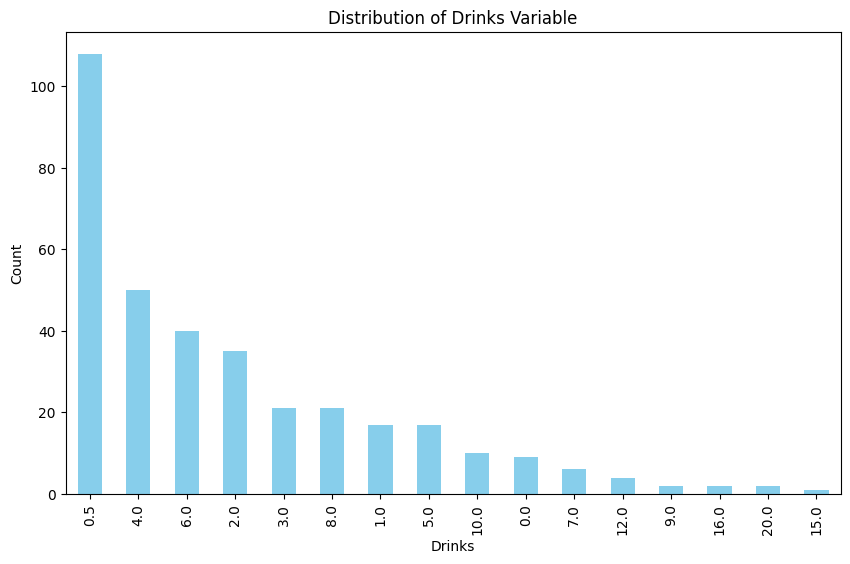

In [3]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'drinks' variable
plt.figure(figsize=(10, 6))
liver_data['drinks'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Drinks Variable')
plt.xlabel('Drinks')
plt.ylabel('Count')
plt.show()


**How are the blood test variables correlated with each other?**

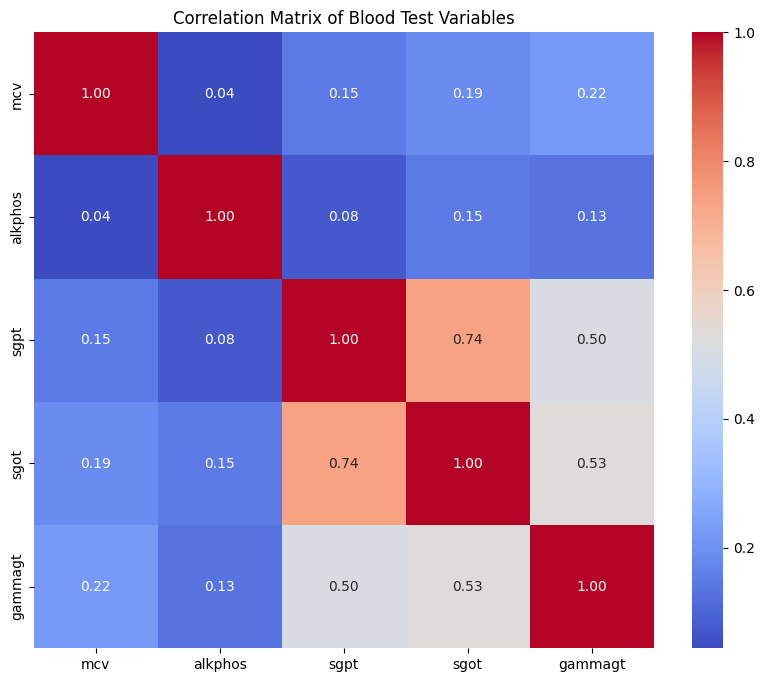

In [4]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = liver_data[['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Blood Test Variables')
plt.show()


In [5]:
# Load liver_details.csv for demographic information
details_data = pd.read_csv('/kaggle/input/liver-disorders/liver_details.csv')


**What is the distribution of the "drinks" variable after dichotomizing, as suggested in the dataset description?**

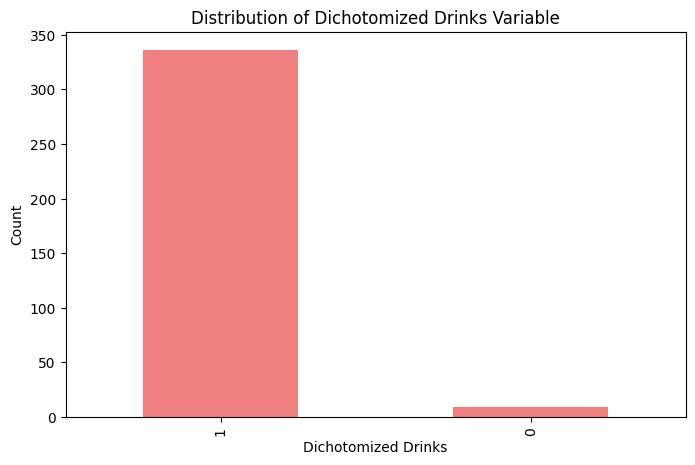

In [6]:
# Convert 'drinks' column to numeric values
liver_data['drinks'] = pd.to_numeric(liver_data['drinks'], errors='coerce')

# Dichotomize the 'drinks' variable
liver_data['dichotomized_drinks'] = liver_data['drinks'].apply(lambda x: 1 if x > 0 else 0)

# Plot the distribution of dichotomized 'drinks'
plt.figure(figsize=(8, 5))
liver_data['dichotomized_drinks'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Dichotomized Drinks Variable')
plt.xlabel('Dichotomized Drinks')
plt.ylabel('Count')
plt.show()


**How does the "gammagt" variable vary with the amount of drinks?**

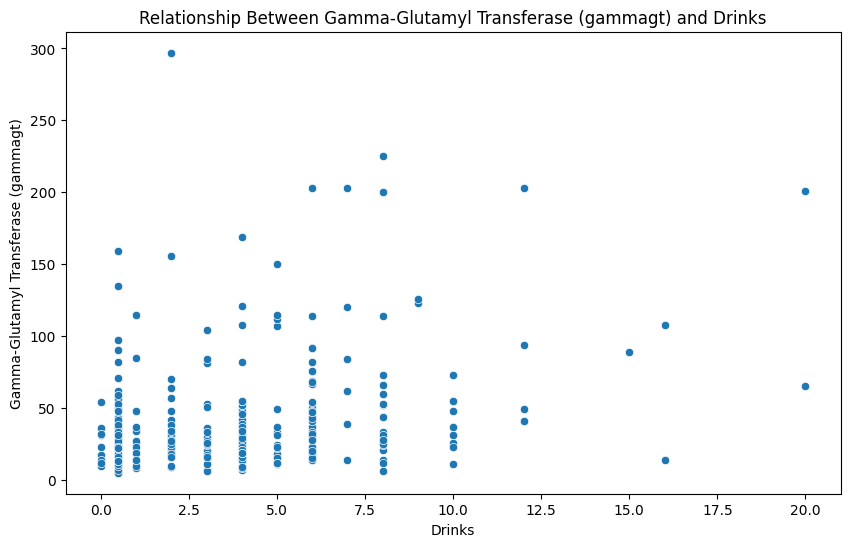

In [7]:
# Plot the relationship between 'gammagt' and 'drinks'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='drinks', y='gammagt', data=liver_data)
plt.title('Relationship Between Gamma-Glutamyl Transferase (gammagt) and Drinks')
plt.xlabel('Drinks')
plt.ylabel('Gamma-Glutamyl Transferase (gammagt)')
plt.show()


**What is the correlation between the blood test variables and the dichotomized drinks variable?**

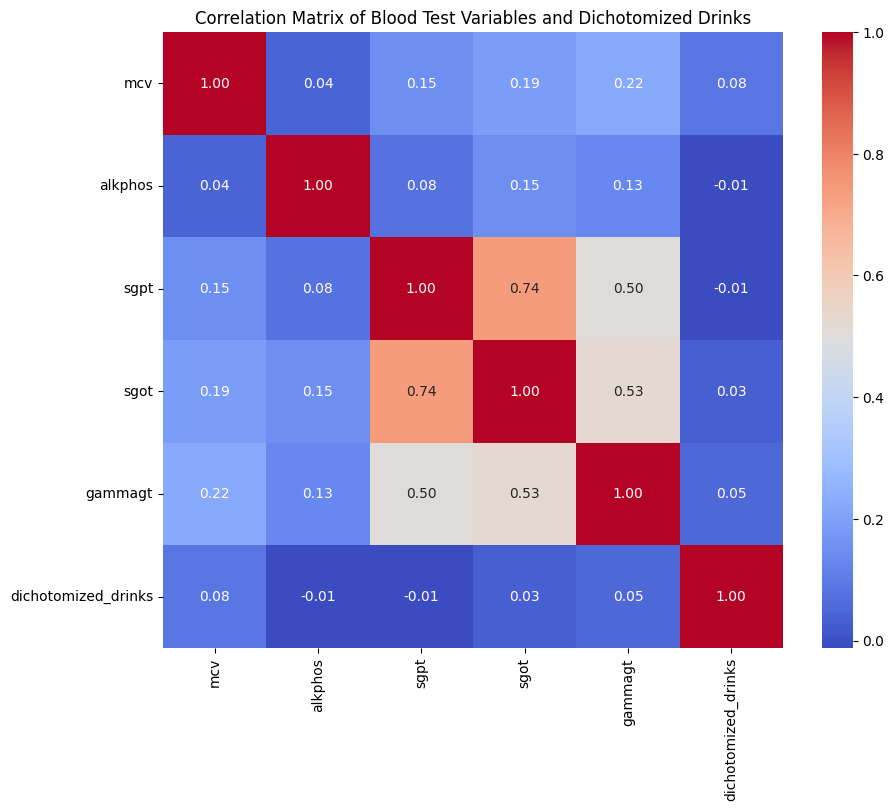

In [8]:
# Calculate correlation matrix
correlation_matrix_drinks = liver_data[['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'dichotomized_drinks']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_drinks, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Blood Test Variables and Dichotomized Drinks')
plt.show()


**Are there any notable trends or patterns in the relationships between blood test variables?**

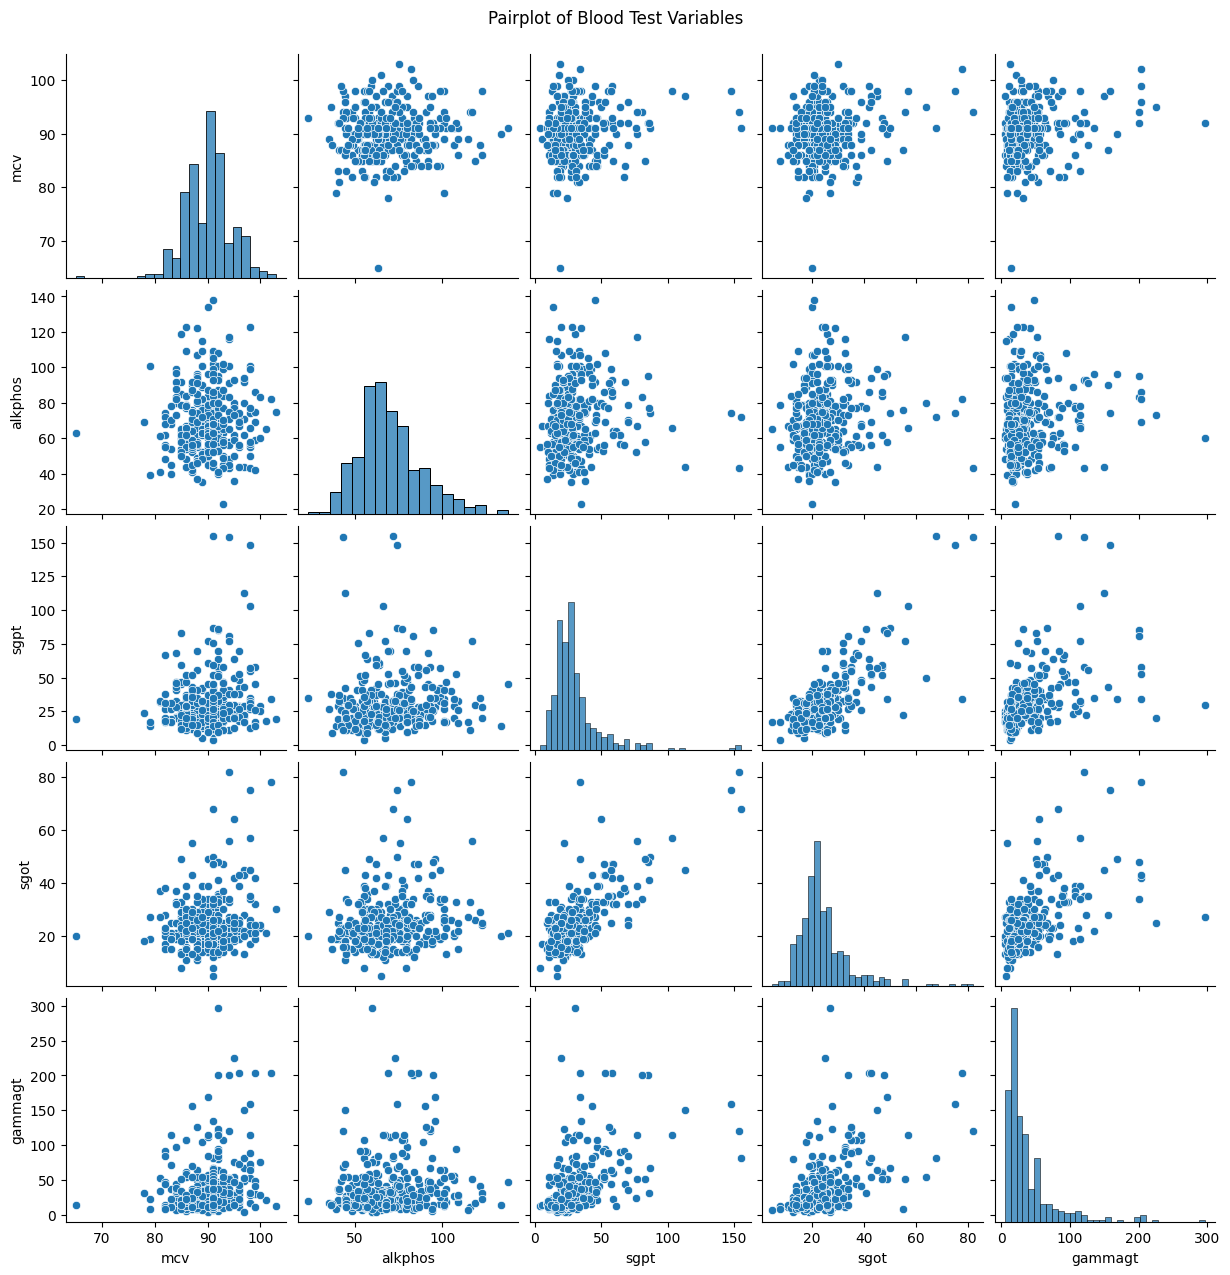

In [9]:
# Pairplot for visualizing relationships between blood test variables
sns.pairplot(liver_data[['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']])
plt.suptitle('Pairplot of Blood Test Variables', y=1.02)
plt.show()


**How does the "sgpt" variable correlate with the "sgot" variable?**

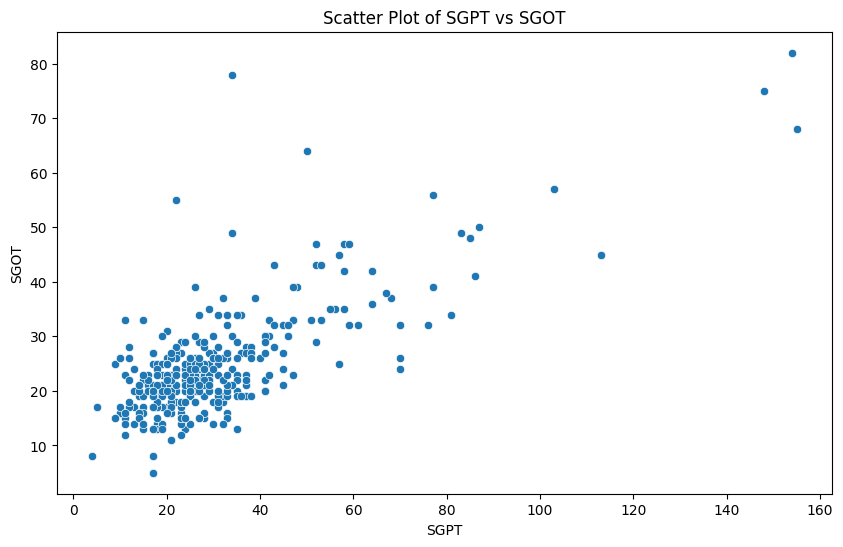

In [10]:
# Scatter plot for 'sgpt' vs 'sgot'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sgpt', y='sgot', data=liver_data)
plt.title('Scatter Plot of SGPT vs SGOT')
plt.xlabel('SGPT')
plt.ylabel('SGOT')
plt.show()


**Is there a noticeable pattern between "alkphos" levels and the number of drinks?**

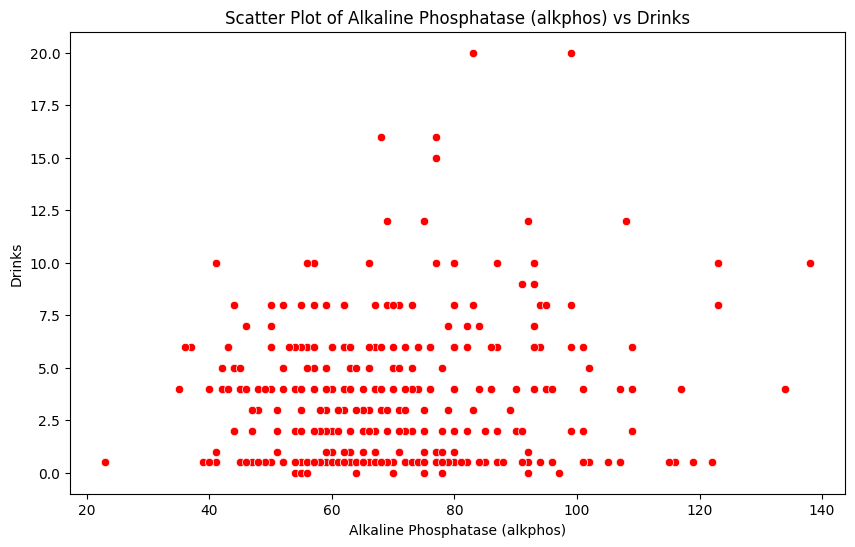

In [11]:
# Scatter plot for 'alkphos' vs 'drinks'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alkphos', y='drinks', data=liver_data, color='red')
plt.title('Scatter Plot of Alkaline Phosphatase (alkphos) vs Drinks')
plt.xlabel('Alkaline Phosphatase (alkphos)')
plt.ylabel('Drinks')
plt.show()


**How does the "gammagt" variable relate to the dichotomized drinks variable?**

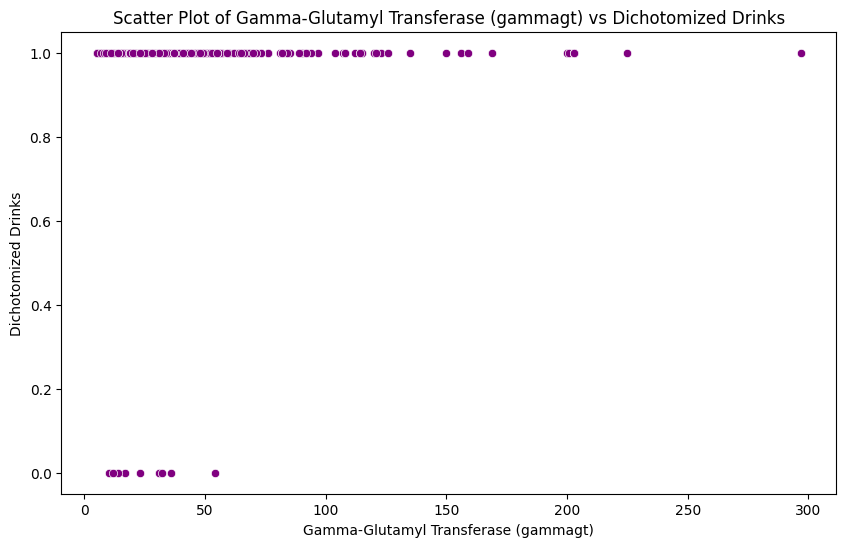

In [12]:
# Scatter plot for 'gammagt' vs 'dichotomized_drinks'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gammagt', y='dichotomized_drinks', data=liver_data, color='purple')
plt.title('Scatter Plot of Gamma-Glutamyl Transferase (gammagt) vs Dichotomized Drinks')
plt.xlabel('Gamma-Glutamyl Transferase (gammagt)')
plt.ylabel('Dichotomized Drinks')
plt.show()


**Explore the distribution of the "gammagt" variable based on the dichotomized drinks.**

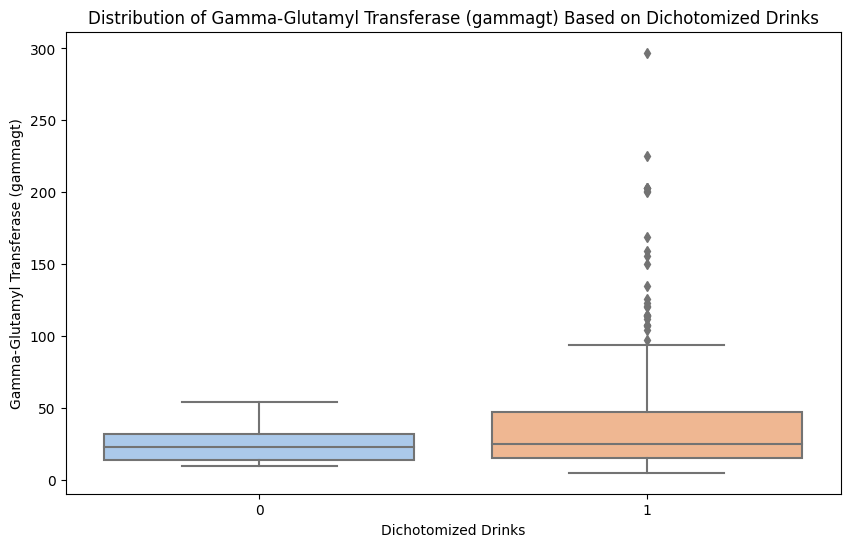

In [13]:
# Plot the distribution of 'gammagt' based on dichotomized drinks
plt.figure(figsize=(10, 6))
sns.boxplot(x='dichotomized_drinks', y='gammagt', data=liver_data, palette='pastel')
plt.title('Distribution of Gamma-Glutamyl Transferase (gammagt) Based on Dichotomized Drinks')
plt.xlabel('Dichotomized Drinks')
plt.ylabel('Gamma-Glutamyl Transferase (gammagt)')
plt.show()


**Investigate the relationship between "mcv" and "sgpt" with size differentiation for the number of drinks.**

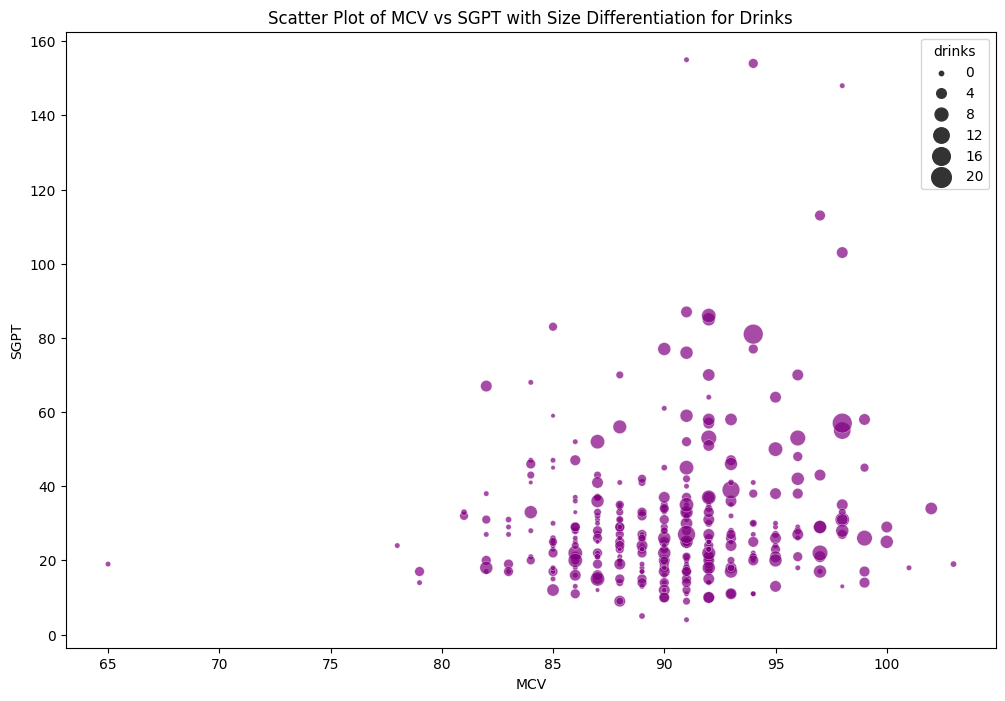

In [14]:
# Scatter plot for 'mcv' vs 'sgpt' with size based on the number of drinks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mcv', y='sgpt', size='drinks', data=liver_data, sizes=(10, 200), color='purple', alpha=0.7)
plt.title('Scatter Plot of MCV vs SGPT with Size Differentiation for Drinks')
plt.xlabel('MCV')
plt.ylabel('SGPT')
plt.show()


**Investigate the relationship between "sgot" and "gammagt" with color differentiation based on the dichotomized drinks variable.**

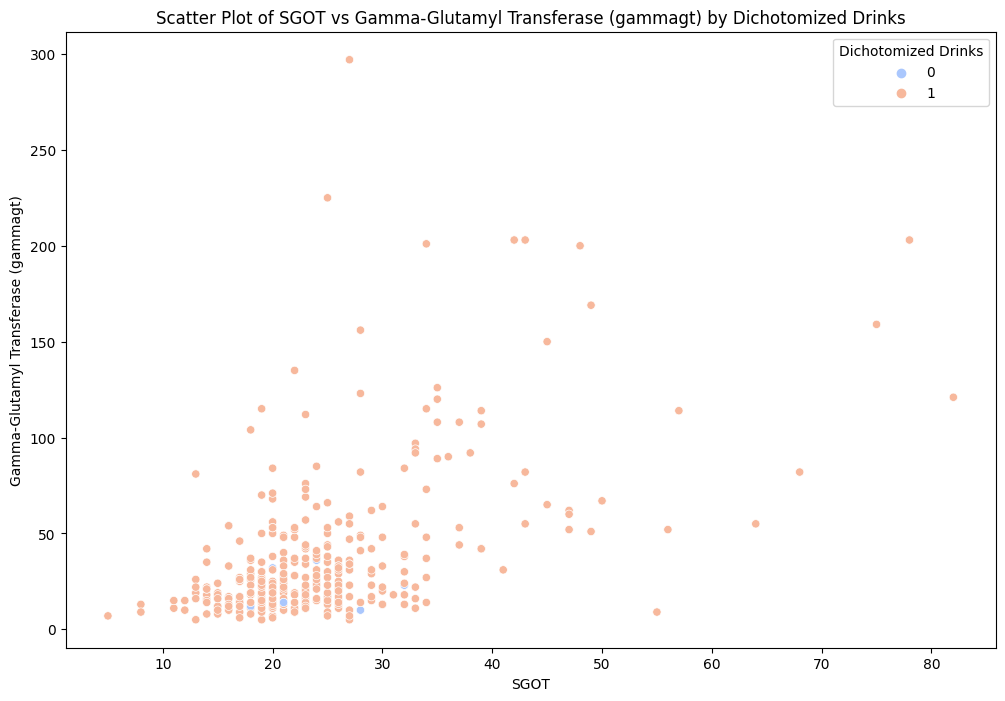

In [15]:
# Scatter plot for 'sgot' vs 'gammagt' with color based on dichotomized drinks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sgot', y='gammagt', hue='dichotomized_drinks', data=liver_data, palette='coolwarm')
plt.title('Scatter Plot of SGOT vs Gamma-Glutamyl Transferase (gammagt) by Dichotomized Drinks')
plt.xlabel('SGOT')
plt.ylabel('Gamma-Glutamyl Transferase (gammagt)')
plt.legend(title='Dichotomized Drinks')
plt.show()


**Explore the relationship between "mcv" and "alkphos" with color differentiation based on the dichotomized drinks variable.**

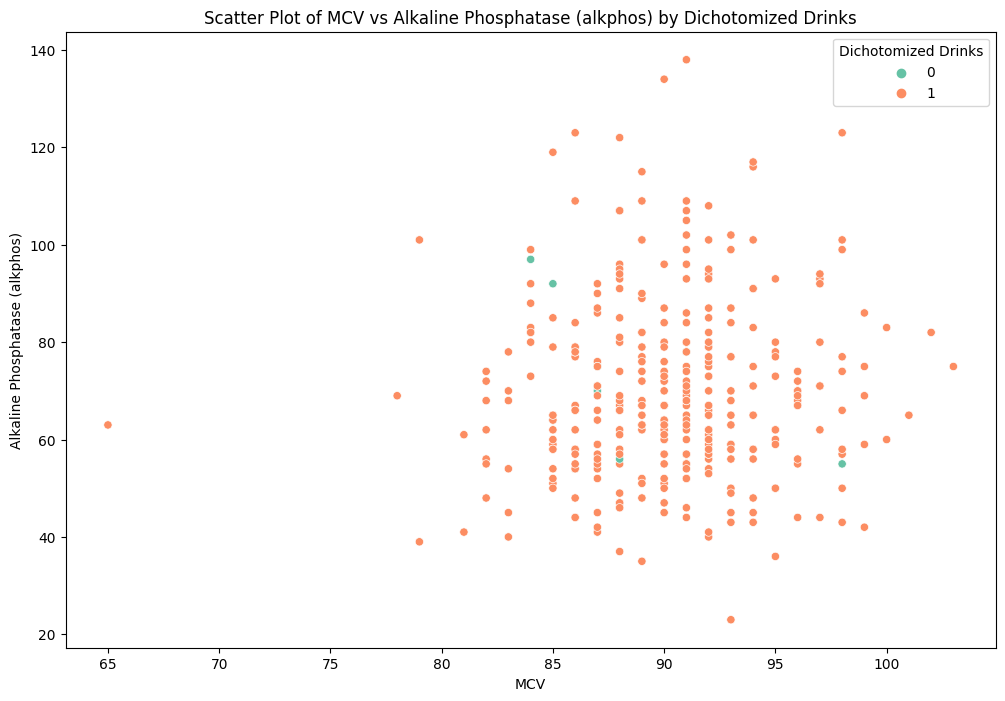

In [16]:
# Scatter plot for 'mcv' vs 'alkphos' with color based on dichotomized drinks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mcv', y='alkphos', hue='dichotomized_drinks', data=liver_data, palette='Set2')
plt.title('Scatter Plot of MCV vs Alkaline Phosphatase (alkphos) by Dichotomized Drinks')
plt.xlabel('MCV')
plt.ylabel('Alkaline Phosphatase (alkphos)')
plt.legend(title='Dichotomized Drinks')
plt.show()


**Investigate the relationship between "sgpt" and "gammagt" with size differentiation based on the number of drinks.**

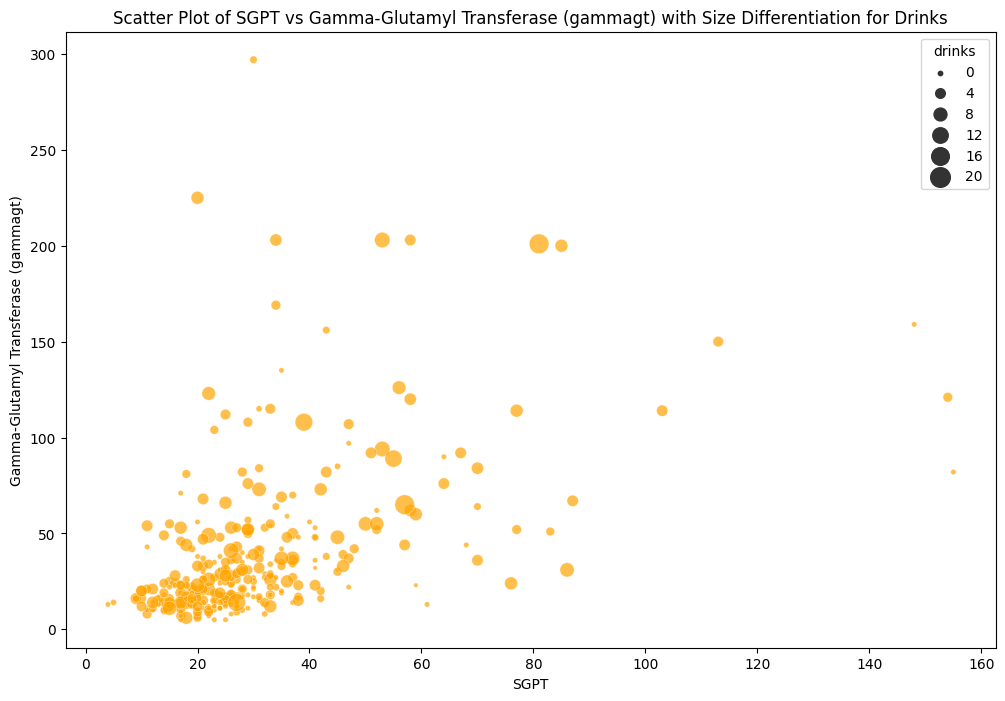

In [17]:
# Scatter plot for 'sgpt' vs 'gammagt' with size based on the number of drinks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sgpt', y='gammagt', size='drinks', data=liver_data, sizes=(10, 200), color='orange', alpha=0.7)
plt.title('Scatter Plot of SGPT vs Gamma-Glutamyl Transferase (gammagt) with Size Differentiation for Drinks')
plt.xlabel('SGPT')
plt.ylabel('Gamma-Glutamyl Transferase (gammagt)')
plt.show()


**nvestigate the relationship between "gammagt" and "drinks" with color differentiation based on the dichotomized drinks variable.**

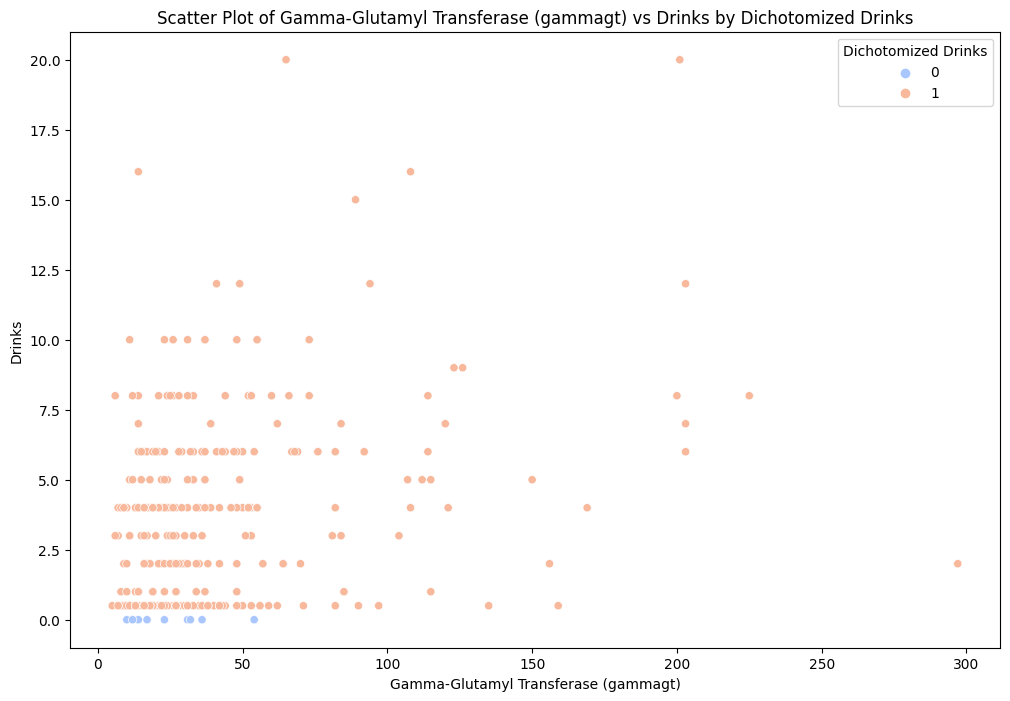

In [18]:
# Scatter plot for 'gammagt' vs 'drinks' with color based on dichotomized drinks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='gammagt', y='drinks', hue='dichotomized_drinks', data=liver_data, palette='coolwarm')
plt.title('Scatter Plot of Gamma-Glutamyl Transferase (gammagt) vs Drinks by Dichotomized Drinks')
plt.xlabel('Gamma-Glutamyl Transferase (gammagt)')
plt.ylabel('Drinks')
plt.legend(title='Dichotomized Drinks')
plt.show()


**Explore the relationship between "alkphos" and "sgot" with color differentiation based on the dichotomized drinks variable.**

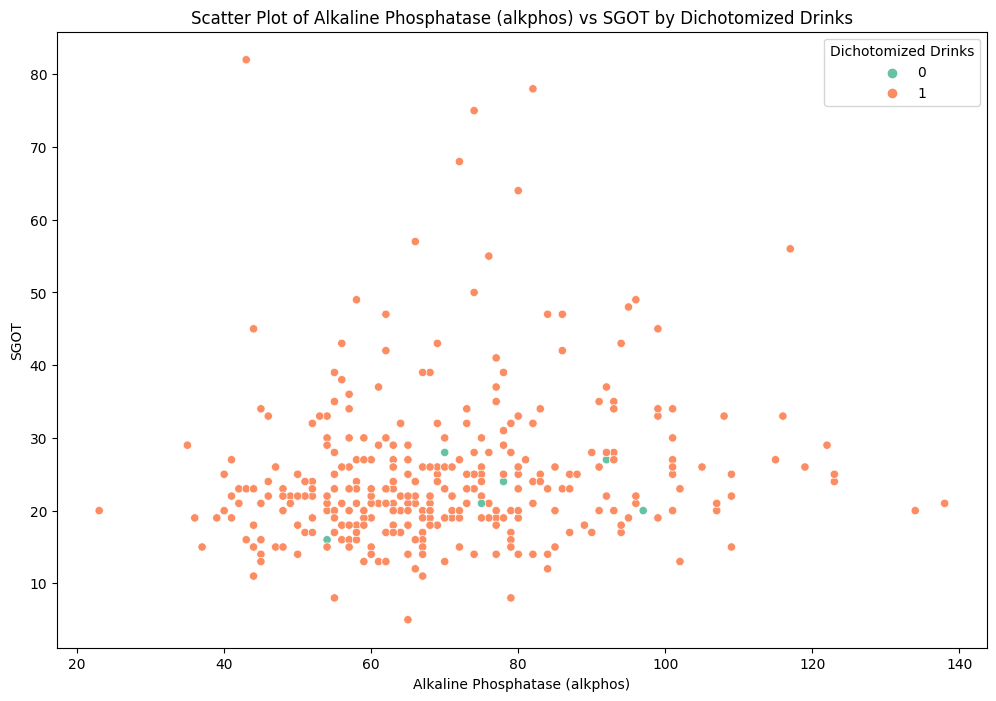

In [19]:
# Scatter plot for 'alkphos' vs 'sgot' with color based on dichotomized drinks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='alkphos', y='sgot', hue='dichotomized_drinks', data=liver_data, palette='Set2')
plt.title('Scatter Plot of Alkaline Phosphatase (alkphos) vs SGOT by Dichotomized Drinks')
plt.xlabel('Alkaline Phosphatase (alkphos)')
plt.ylabel('SGOT')
plt.legend(title='Dichotomized Drinks')
plt.show()


**Explore the relationship between "gammagt" and "mcv" with size differentiation based on the number of drinks.**

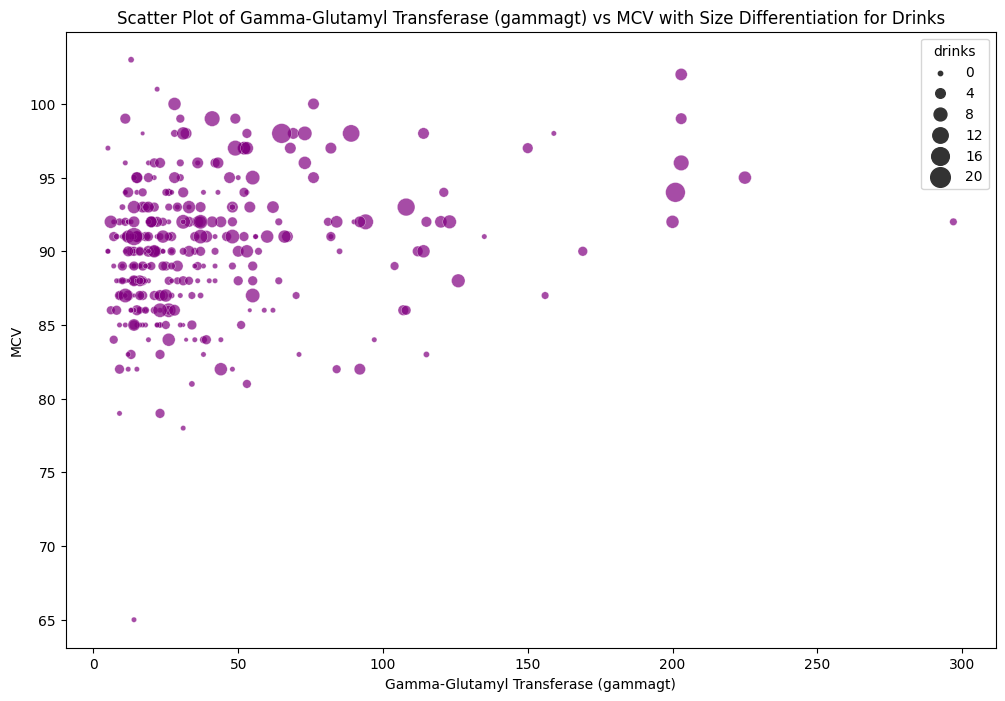

In [20]:
# Scatter plot for 'gammagt' vs 'mcv' with size based on the number of drinks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='gammagt', y='mcv', size='drinks', data=liver_data, sizes=(10, 200), color='purple', alpha=0.7)
plt.title('Scatter Plot of Gamma-Glutamyl Transferase (gammagt) vs MCV with Size Differentiation for Drinks')
plt.xlabel('Gamma-Glutamyl Transferase (gammagt)')
plt.ylabel('MCV')
plt.show()


**Explore the relationship between "mcv" and "drinks" with size differentiation based on the number of drinks.**

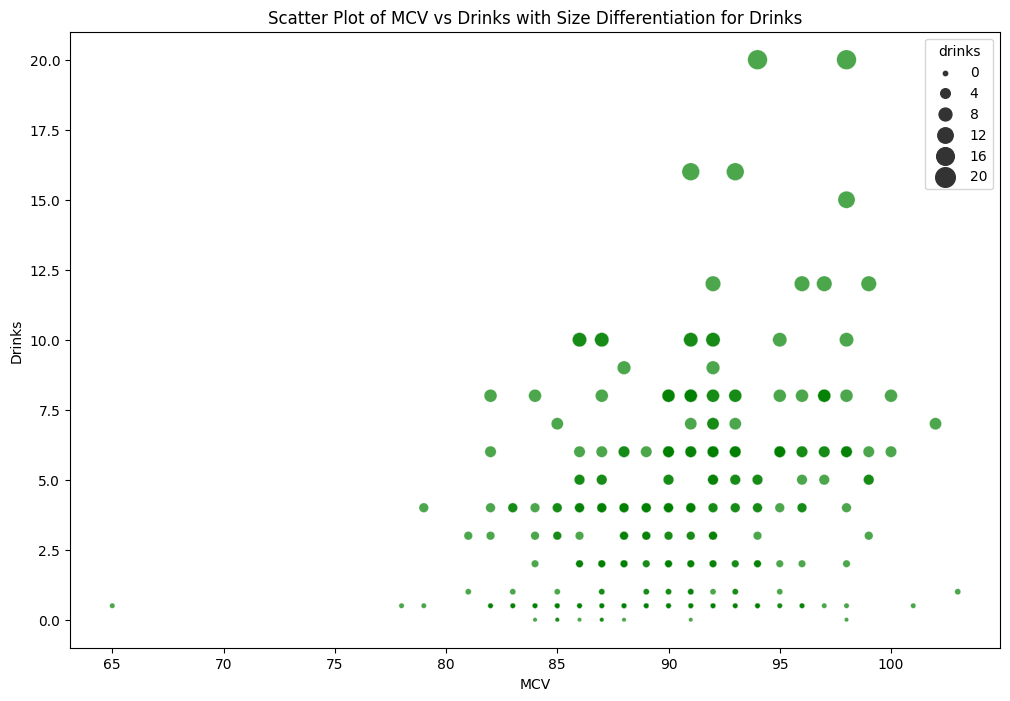

In [21]:
# Scatter plot for 'mcv' vs 'drinks' with size based on the number of drinks
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mcv', y='drinks', size='drinks', data=liver_data, sizes=(10, 200), color='green', alpha=0.7)
plt.title('Scatter Plot of MCV vs Drinks with Size Differentiation for Drinks')
plt.xlabel('MCV')
plt.ylabel('Drinks')
plt.show()
